# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM 1**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Climate Change Tweet Classification Challenge

<!-- The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are.  -->

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering/Preprocessing</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. App and Model Explanations</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

The end goal of this research is to look at the tweets from individuals and determine if that particular person believe in the climate change or not. At the end we shall create a model that is able to perfom this task well and deploying using streamlit so that it can be available for everyone to use.

 <a id="one"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [64]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import wordcloud
from collections import Counter
from wordcloud import WordCloud
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Libraries for data preparation and model building
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
from string import punctuation

# Libraries from Sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Precious\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Precious\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a id="two"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [5]:
train_data = pd.read_csv('train.csv') # load the train data
test_data = pd.read_csv('test.csv')  # load the test data

#### Loading and displaying an overview of the data

In [6]:
#overview dataset
print(f' There are {train_data.shape[0]} rows and {train_data.shape[1]} columns')
train_data.head(3)

 There are 15819 rows and 3 columns


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562


<a id="three"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



##### Let us Explain the Features in our Training Data

In [16]:
# calling the head function to display the FIVE top records of the data
train_data.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


Our training Data contains 3 features, namely:

 * Sentiment (dependent variable)
 * Message
 * TweetId

Feature descriptions

    1. sentiment: This is the sentiment of tweets made by users and it will be our dependent variable. This is the feature our model  wil have to predict when we show it our test data.
    
    2. message: This is the content of the tweets provided 
    
    3. tweetid: This is the ID (number identity) of each of the tweets at the time it was given


##### We will explain what the values i.e classes in our dependent variable mean

The ***Sentiment*** feature have these values:

   * 2 News: the tweet links to factual news about climate change
   * 1 Pro: the tweet supports the belief of man-made climate change
   * 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
   * -1 Anti: the tweet does not believe in man-made climate change

Class definion source: https://www.kaggle.com/competitions/edsa-climate-change-belief-analysis-2022/data

###### Looking at the Features in the Test Set

In [13]:
test_data.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


The test data contains two features, which are:

 * Message
 * TweetId
 
This makes sense because we want our model to look at this data and predict the sentiment of the Tweet's author on Climate Change.

#### Data Information

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
sentiment    15819 non-null int64
message      15819 non-null object
tweetid      15819 non-null int64
dtypes: int64(2), object(1)
memory usage: 370.8+ KB


We have in our dataframe a total of 3 columns          
The sentiment and tweetid contains numbers i.e numerical with datatype int64      
The message column contains texts with datatypes object

***Note that we would need to vectorize i.e convert those texts into numbers that our Machine Learning model can interpret***


In [25]:
#check if there are null values in our data
train_data.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

From the above cell, there are no null values in our data which makes it easy to carry out processsing.

Let us proceed to see the size of our dataset

In [27]:
train_data.shape

(15819, 3)

From the data, we have a total of 15819 observations and 3 columns

Let us Print off a list of all the sentiment types present in the dataset

In [28]:
type_Sentiments = list(train_data.sentiment.unique())
print(type_Sentiments)

[1, 2, 0, -1]


Just as we described in the data overview, we have 4 classes in our sentiment column 

Let's have a look at how many data samples we have for each of the different sentiment types.

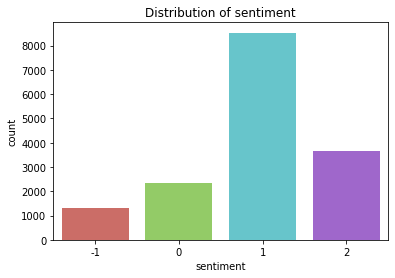

In [29]:
sns.countplot(x = 'sentiment', data = train_data, palette="hls")
plt.title("Distribution of sentiment");

There is obviously an imbalance in the various classes.

Let us check the percentage of these classes to understand the imbalance we just observed 


we have the percentage for categorical columns as: 
 1    53.922498
 2    23.010304
 0    14.874518
-1     8.192680
Name: sentiment, dtype: float64


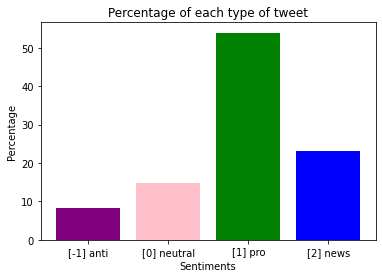

In [59]:
## Check the Percentage of the distribution in our data 
print("we have the percentage for categorical columns as: ")
d = train_data['sentiment'].value_counts(normalize = True) * 100 # series
print(d)

## plot for analysis
labels = train_data['sentiment'].unique()
plt.bar(x = d.index, height = d.values, label = d.index, color= ['green','blue','pink','purple'])
plt.xlabel("Sentiments")
plt.xticks(labels,['[1] pro','[2] news','[0] neutral','[-1] anti'])
plt.ylabel("Percentage")
plt.title("Percentage of each type of tweet")
plt.show()

From the observations seen in both visualizations, we can conclude that:
   1. The sentiment types are unevenly distributed 
   2. Pro(1) has over 8000 data samples represented as the highest and taking about 54% of the overall data
   3. Anti(-1) has the lowest data samples represented with a little above 1000 samples and contains just 8% of the overall data
   
We would carry out Resampling i.e To balance the data set in the Preprocessing Chapter of our notebook
   

##### Next we will carry out a count of  the most common words in our data 

In [65]:
train_data['temp_list'] = train_data['message'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(15))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='YlGnBu')

,Common_words,count
0,climate,12170
1,RT,9706
2,change,8865
3,to,7066
4,the,6397
5,of,4176
6,is,4143
7,a,3825
8,global,3575
9,in,3406


Let us visualize this counts

In [68]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

From the above image and counts in the previous cell, we can see that Climate has the most mentions or common words.
This is not suprising as it is the main theme of the project we are working on.

Another observation we can see is that words or mentions like RT, and other bag of words (to, the, off, a, in, on, and, etc) are also taking a huge chunk of the most common words.
This can be attributed to them forming the context of words and sentences

### Next, we will visualize these common words using Word Cloud for the various sentiment categories 

#### Let us Vitualize using WordClouds

We will be building wordclouds in the following order:

   * WordCloud of Tweets showing Neutrality i.e 0
   * WordCloud of Tweets Supporting Claim i.e 1
   * WordCloud of Tweets Not Supporting Claim i.e -1
   * WordCloud of Tweets with links to factual news about climate change i.e 2



In [71]:
# Classify each sentiment into categories
Positive_sent = train_data[train_data['sentiment']== 1]
Negative_sent = train_data[train_data['sentiment']== -1]
Neutral_sent = train_data[train_data['sentiment']== 0]
Other_sent = train_data[train_data['sentiment']== 2]

In [72]:

def plot_wordcloud(message, mask=None, max_words=200, max_font_size=100, figure_size=(8,8), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(message))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/kaggle/input/masks-for-wordclouds/'

##### WORDCLOUD OF NEUTRAL TWEETS

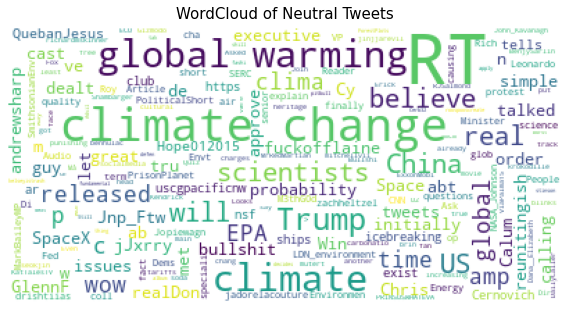

In [74]:
#to get the wordcloud of Neutral Tweet
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(Neutral_sent.message,color='white',max_font_size=50,
               title_size=15,title="WordCloud of Neutral Tweets")

#### WORDCLOUD OF POSITIVE TWEETS

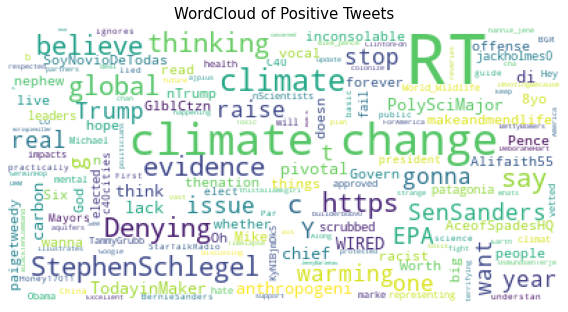

In [78]:
# to get the wordcloud of Positive Tweets
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(Positive_sent.message,color='white',max_font_size=50,
               title_size=15,title="WordCloud of Positive Tweets")

##### WORDCLOUD OF NEGATIVE TWEETS

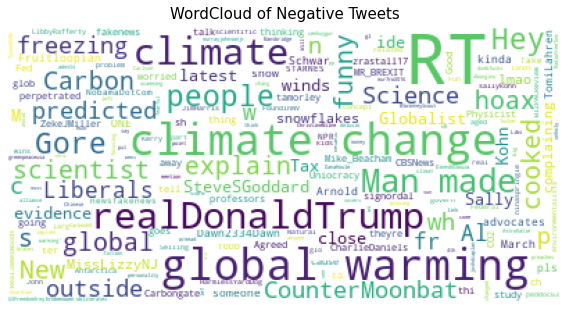

In [77]:
# to get the wordcloud of negative tweets
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(Negative_sent.message,color='white',max_font_size=50,
               title_size=15,title="WordCloud of Negative Tweets")

<a id="four"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


 **Feature Engineering:**

   * The number of words in a text
   * The number of unique words in a text
   * The number of unique characters in a text
   *  Number of stopwords
   * Number of Title case words
   * Avg length of words in a text

**Text Preprocessing:**

   * Spelling corections
   * Converting to lowercase
   * Remove special characters
   * Remove stopwords/ urls



---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic